In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


Fixed Loss Scaling with Different Scales
===


In [2]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import spline
import seaborn as sns

In [3]:
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
def get_best_val_map(train_dir):
    """ Get the best validation map from the log file in the train_dir. """
    train_log = pd.read_json(os.path.join(train_dir, 'log'))
    return train_log['validation/main/map'].max()

In [5]:
DIRS = {
    '8': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_8.20200102',
    '128': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_128.20200102',
    '512': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_512.20200116',
    '1024': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_1024.20200103',
    '2048': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_2048.20200118',
    '4096': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_4096.20200119',
    '8192': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/object_detection/ssd300/fixed.GPU_1_scale_8192.20200104',
}

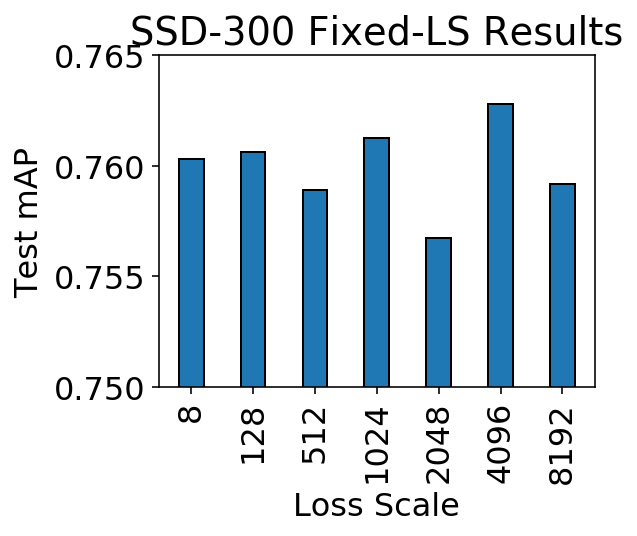

In [6]:
vals = [get_best_val_map(d) for d in DIRS.values()]
keys = list(DIRS.keys())

fig, ax = plt.subplots(figsize=(4.5, 4))

ax.bar(np.arange(len(vals)),
       vals,
       width=0.4,
       edgecolor='k')
ax.set_ylim([0.75, 0.765])
ax.set_ylabel('Test mAP')
ax.set_xlabel('Loss Scale')
ax.set_xticks(np.arange(len(keys)))
ax.set_xticklabels(keys, rotation='vertical')
ax.set_title('SSD-300 Fixed-LS Results')

fig.tight_layout()
fig.savefig('SSD-300_Fixed-LS_Results.pdf')